               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

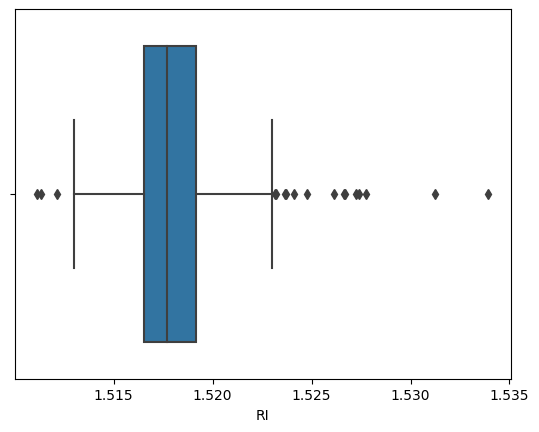

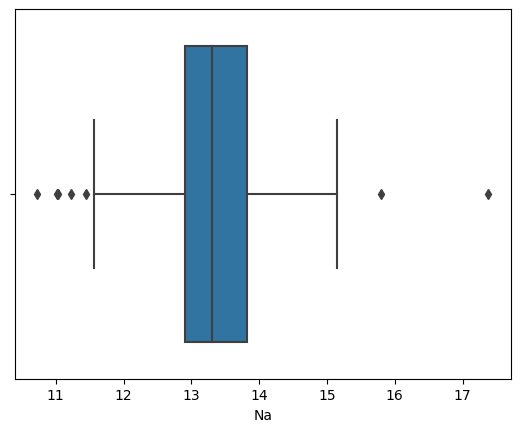

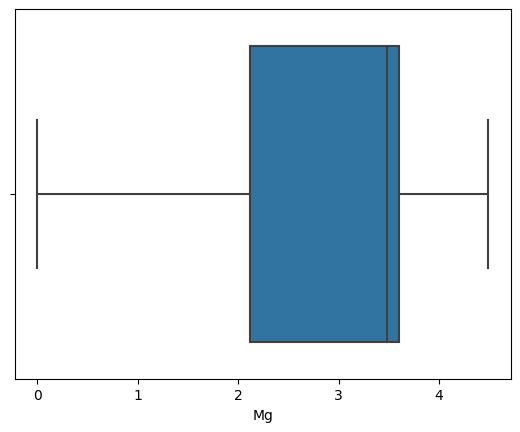

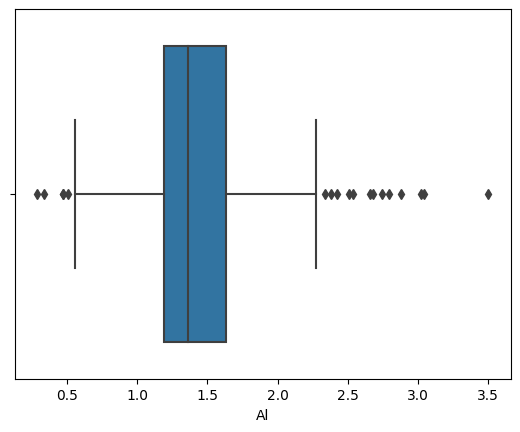

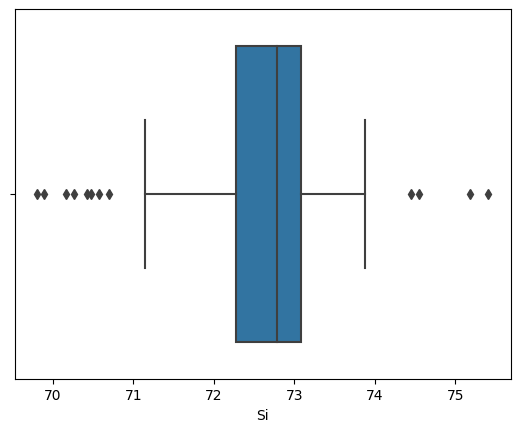

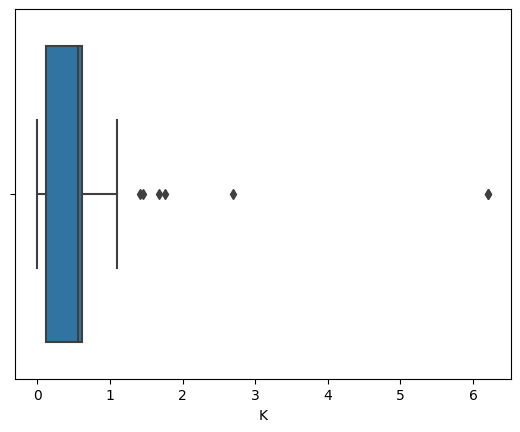

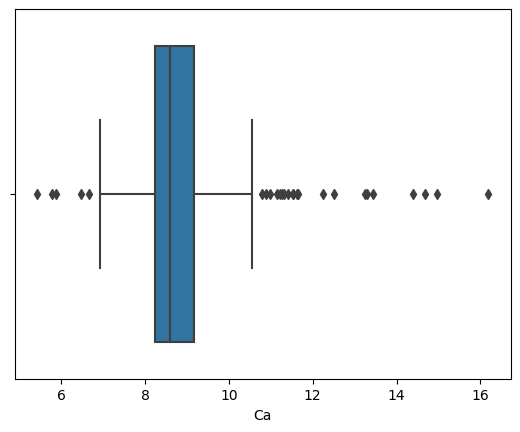

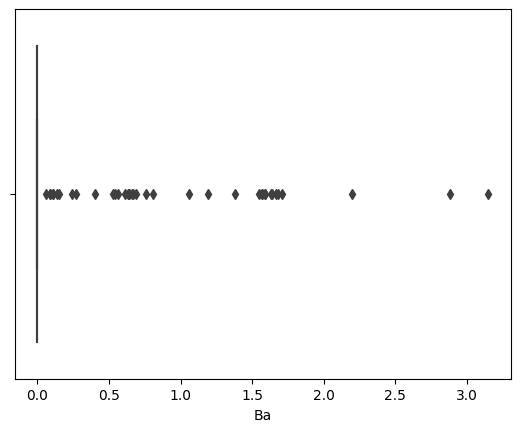

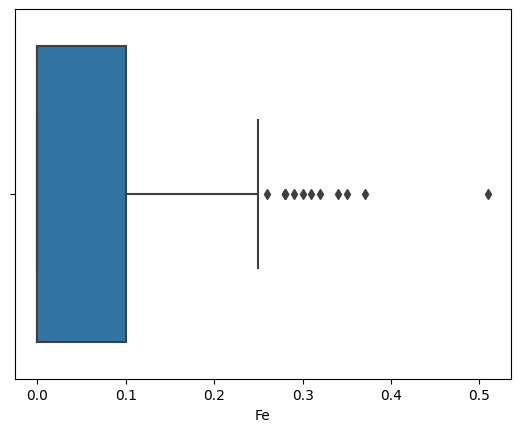

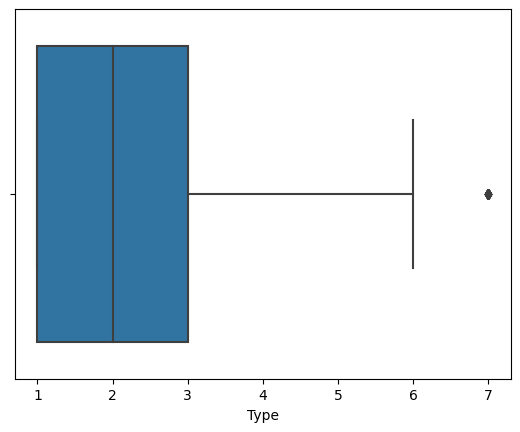

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("/kaggle/input/glass/glass.csv")

# Get descriptive statistics (stats of the data set based on the type)
print(data.describe(include='all'))

# Check for missing values
print(data.isnull().sum())

# Perform data visualization
for col in data.columns:
    sns.boxplot(x = col, data=data)
    plt.show()


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming your data is loaded into a DataFrame named 'data'

# Define the list of numerical features (replace with actual column names)
numerical_features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Fe']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical features
data_scaled = scaler.fit_transform(data[numerical_features])

# Convert the scaled data back to a DataFrame (optional, but recommended for clarity)
data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_features)  # Create DataFrame from scaled data

# Combine scaled features back with categorical features (if applicable)
categorical_features = ['Type']
data_preprocessed = pd.concat([data_scaled_df, data[categorical_features]], axis=1)


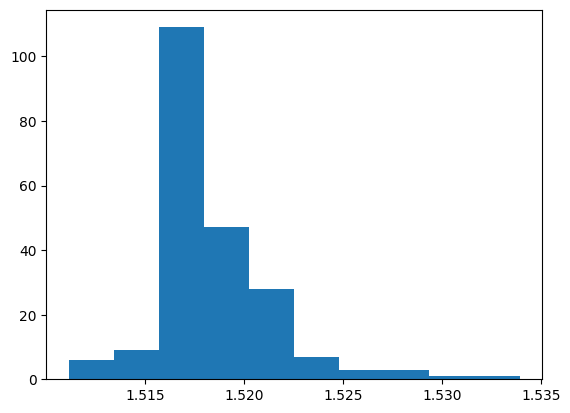

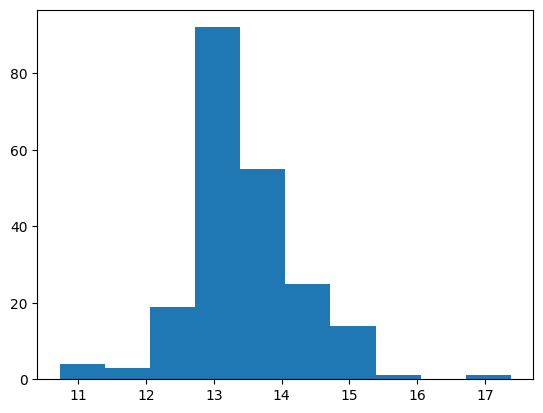

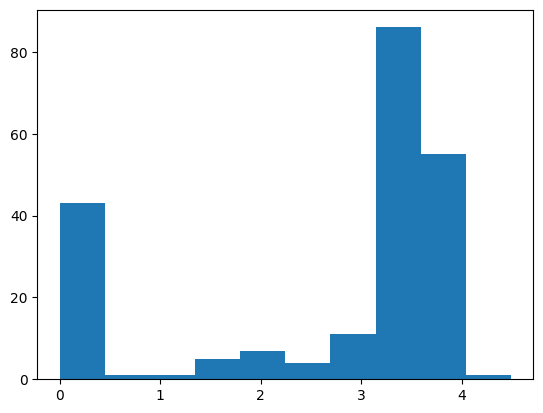

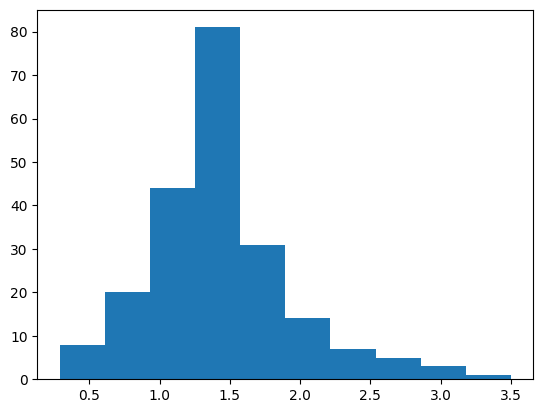

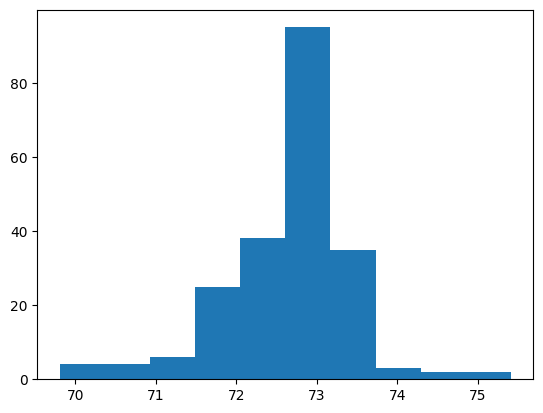

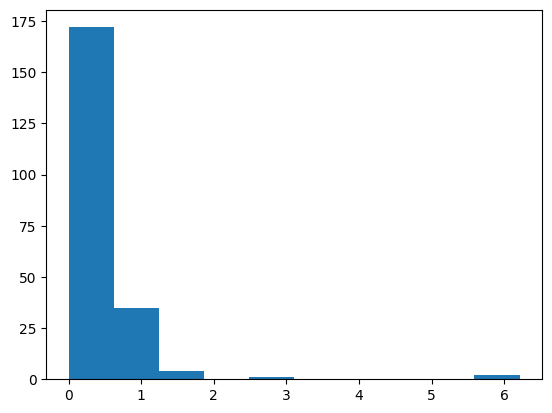

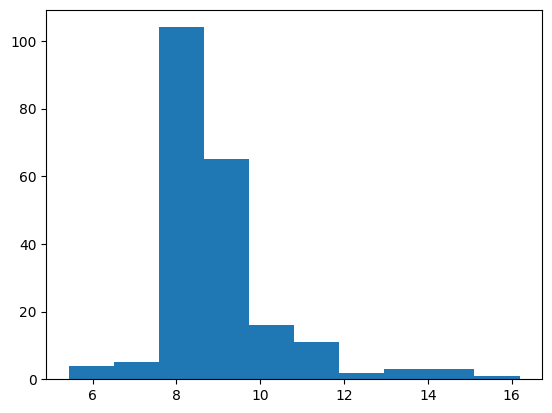

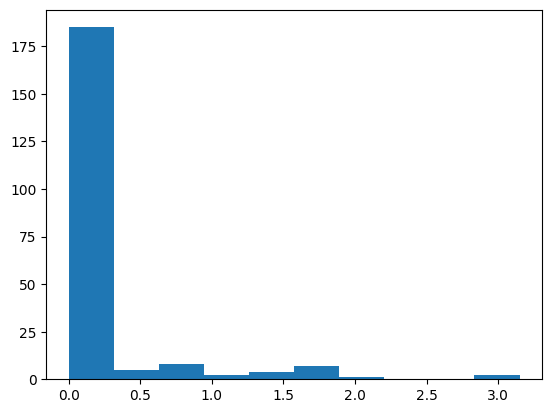

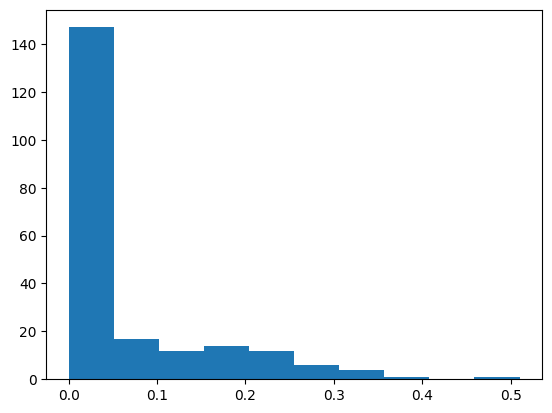

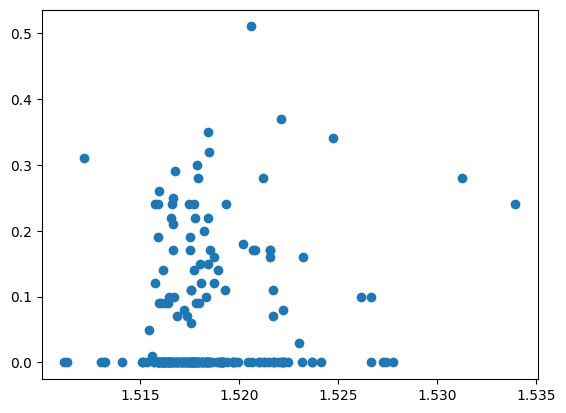

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.hist(data['RI'])
plt.show()

plt.hist(data['Na'])
plt.show()

plt.hist(data['Mg'])
plt.show()

plt.hist(data['Al'])
plt.show()

plt.hist(data['Si'])
plt.show()

plt.hist(data['K'])
plt.show()

plt.hist(data['Ca'])
plt.show()

plt.hist(data['Ba'])
plt.show()

plt.hist(data['Fe'])
plt.show()

refractive_index = list(data['RI'])
ferrous = list(data['Fe'])
barium = list(data['Ba'])
potassi = list(data['K'])
calci = list(data['Ca'])
sod = list(data['Na'])
mag = list(data['Mg'])
silica = list(data['Si'])
alumin = list(data['Al'])
data_points = []
for i in range(len(refractive_index)):
    data_points.append([refractive_index[i], ferrous[i], barium[i], potassi[i], calci[i], sod[i], mag[i], silica[i], alumin[i]])

x, y, z, a, b, c, d, e, f = zip(*data_points)

plt.scatter(x, y)
plt.show()
# plt.scatter(data['Refractive Index'],data['Ferous'],data['Barium'],data['Potassi'],data['Calci'],data['Sod'],data['Mag'],data['Silica'], data['Alumin'])
# plt.show()



In [4]:
from sklearn.cluster import KMeans

# Choose the number of clusters (k) based on domain knowledge or techniques like elbow method
k = 2

# Create a KMeans object
kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)

# Fit the model to the data
kmeans.fit(data_preprocessed)

# Print cluster labels
print(kmeans.labels_)

# Evaluate clustering performance (accuracy is not directly applicable here)
from sklearn.metrics import silhouette_score
silhouette_score(data_preprocessed, kmeans.labels_)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


0.512455384545769

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss  # Alternative to oversampling
from imblearn.combine import SMOTEENN  # Combines SMOTE with ENN for class balancing (optional)


cluster_labels = kmeans.labels_

# Calculate cluster proportions
cluster_counts = pd.Series(cluster_labels).value_counts()
total_data_points = len(cluster_labels)
cluster_proportions = (cluster_counts / total_data_points) * 100

# Explore initial cluster proportions (optional)
print("Initial Cluster Proportions:")
print(cluster_proportions)

# Choose balancing technique (consider ethical implications of oversampling)
# Option 1: Undersampling using NearMiss (alternative to oversampling)
undersample = NearMiss(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(data_preprocessed, cluster_labels)

# Option 2: Oversampling with SMOTEENN (optional, use with caution)
# smoteenn = SMOTEENN(random_state=42)
# X_resampled, y_resampled = smoteenn.fit_resample(data_preprocessed, cluster_labels)

# Perform clustering on balanced data
kmeans.fit(X_resampled)
cluster_labels_balanced = kmeans.labels_

# Evaluate clustering results (silhouette score, Calinski-Harabasz index)

# Explore cluster proportions after balancing (optional)
print("Cluster Proportions After Balancing:")
print(pd.Series(cluster_labels_balanced).value_counts() / len(cluster_labels_balanced) * 100)


Initial Cluster Proportions:
0    76.168224
1    23.831776
Name: count, dtype: float64
Cluster Proportions After Balancing:
0    51.960784
1    48.039216
Name: count, dtype: float64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler  # Added for data scaling

# Assuming 'data_preprocessed' contains your features and 'data["Type"]' is the target variable
X = data_preprocessed  # Assuming features are in 'data_preprocessed'
y = data["Type"]     # Assuming target variable is in 'data["Type"]'

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (consider if features have different scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Logistic Regression model (consider increasing max_iter if convergence warning occurs)
model = LogisticRegression(max_iter=1000)  # Increased max_iter from default (100)

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9069767441860465
Precision: 0.9218726250189999
Recall: 0.9069767441860465
